In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import numpy as np
import sys
import os
from matplotlib import pyplot as plt
import pickle
import climtools_lib as ctl
from scipy import stats
import xarray as xr
import glob
import pymannkendall as mk
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
titlefont = 22
plt.rcParams['figure.titlesize'] = titlefont
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['legend.fontsize'] = 18

#############################################################################

cart_out = '/home/fabiano/Research/lavori/BOTTINO/simple_maps/'

colors = ['black', 'royalblue', 'lightslategray', 'forestgreen', 'orange', 'chocolate', 'maroon', 'violet', 'crimson']
allru = ['pi', 'hist', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100', 'ssp585']

libgfortran.so.3: cannot open shared object file: No such file or directory
No DISPLAY variable set. Switching to agg backend


In [2]:
cart_in = '/home/fabiano/Research/lavori/BOTTINO/seasmean/'

yeamean = pickle.load(open(cart_in + 'bottino_seasmean_2D_b025.p', 'rb'))
coso = yeamean[('b025', 'tas')]
del yeamean

anom_maps, patt_maps = pickle.load(open(cart_out + 'all_maps_1000.p', 'rb'))

### Calc a regression across different forcing levels (temp)

In [30]:
co2_levels = np.log(np.array([1.25, 1.5, 2, 2.5, 3, 4]))

patt_maps.keys()

var = 'tas'
patts = np.stack([patt_maps[(var, ru, 'stab')] for ru in allru[2:-1]])

In [6]:
patts.shape

(6, 256, 512)

In [10]:
len(co2_levels), patts.shape[0]

(6, 6)

In [31]:
tas_trend, tas_intercept, tas_trend_err, tas_intercept_err, tas_pval = ctl.calc_trend_climatevar(co2_levels, patts)

In [12]:
%matplotlib inline

Adding cyclic point



<GeoAxesSubplot:>

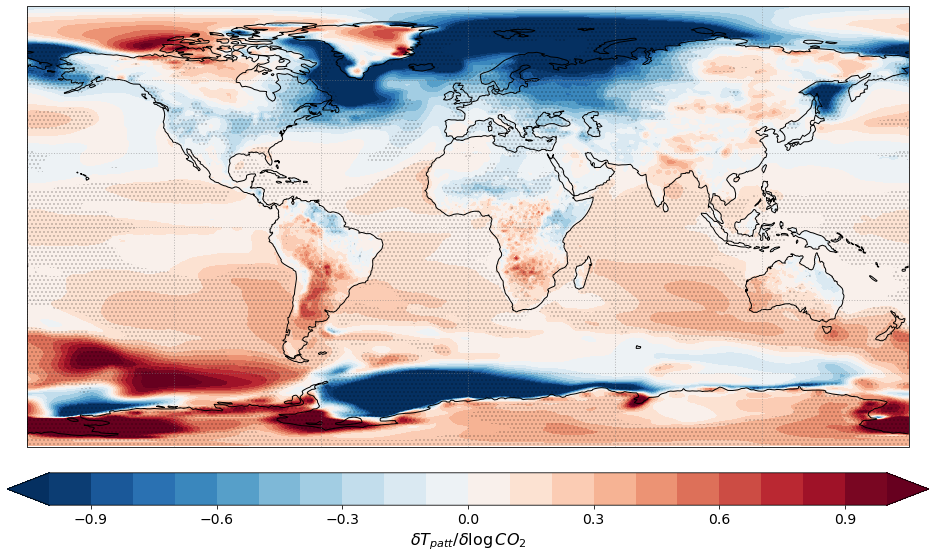

In [46]:
ctl.plot_map_contour(tas_trend, coso.lat, coso.lon, plot_anomalies=True, cbar_range=(-1., 1.), cb_label = r'$\delta T_{patt}/\delta \log CO_2 $', cmap = 'RdBu_r', add_hatching = (tas_pval < 0.05), hatch_styles = ['', '', '...'], figsize = (16,9), filename = cart_out + 'deltaTpatt_vs_deltaCO2.pdf')#ctl.heatmap())

### Now for relative prec

In [37]:
var = 'pr_rel'
patts = np.stack([patt_maps[(var, ru, 'stab')] for ru in allru[2:-1]])
pr_trend, pr_intercept, pr_trend_err, pr_intercept_err, pr_pval = ctl.calc_trend_climatevar(co2_levels, patts)

Adding cyclic point



<GeoAxesSubplot:>

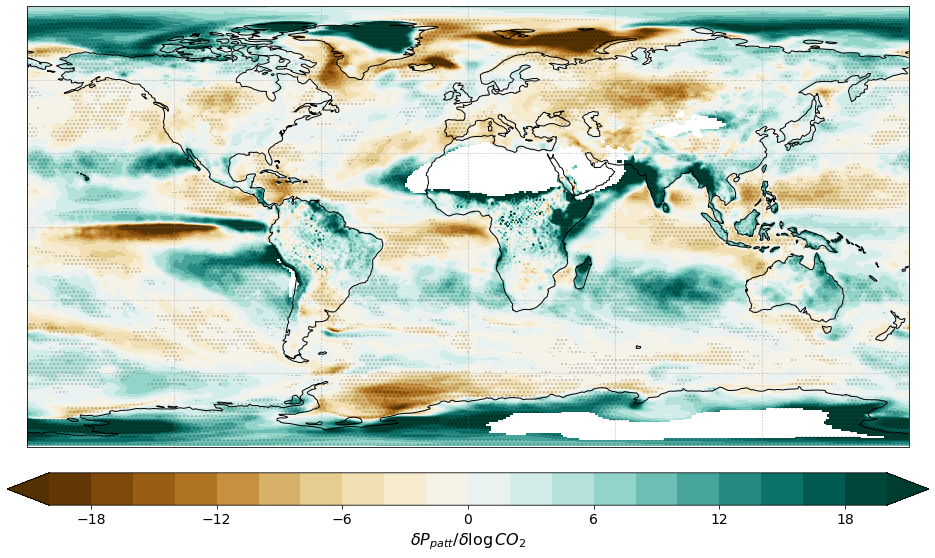

In [47]:
ctl.plot_map_contour(pr_trend, coso.lat, coso.lon, plot_anomalies=True, cbar_range=(-20, 20), cb_label = r'$\delta P_{patt}/\delta \log CO_2 $', cmap = 'BrBG', add_hatching = (pr_pval < 0.05), hatch_styles = ['', '', '...'], figsize = (16,9), filename = cart_out + 'deltaPpatt_vs_deltaCO2.pdf')